In [37]:
import numpy as np
# import gensim/
import seaborn as sns
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import warnings
warnings.filterwarnings("ignore")
import requests
import gensim
import pprint
from bs4 import BeautifulSoup
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
import pandas as pd


### Loading GloVE model from .txt

In [2]:

def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

In [3]:
glove_model=load_glove_model("/Users/amansawarn/Documents/tech/iitd/Building-Search-and-Recommendations-Together/glove_6B/glove.6B.50d.txt")



Loading Glove Model
400000 words loaded!


In [18]:
glove_model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ])

In [28]:
def plot_embeddings(glove_model, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , k)): matrix of k-dimensioal word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    # ------------------
    # Write your implementation here.
    # simulating a pandas df['type'] column
    
    for word in words:
        x = reduce_to_k_dim(glove_model[word].reshape(1, -1))
        y = reduce_to_k_dim(glove_model[word].reshape(1, -1))
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+0.0001, y+0.0001, word, fontsize=20)
    plt.show()

    # ------------------
    
def reduce_to_k_dim(M, k=2):
    """ Reduces a M dimension Vector to k dimension using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy array): Embedding Vector Size
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
#     print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
#     pca=PCA(n_components=2)
#     M_reduced= pca.fit_transform(M)
    svd = TruncatedSVD(n_components=k)
    M_reduced = svd.fit_transform(M)
    
    # ------------------

  
    return M_reduced

--------------------------------------------------------------------------------
Outputted Plot:


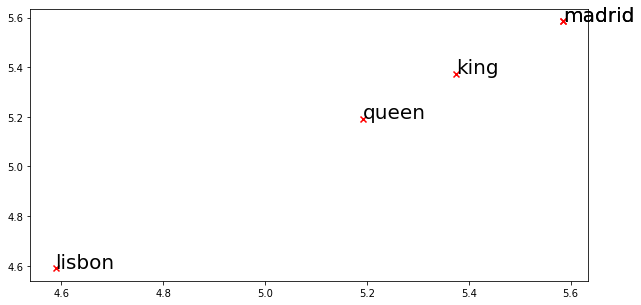

--------------------------------------------------------------------------------


In [27]:
print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
words=['king', 'queen', 'madrid', 'madrid', 'lisbon']
plot_embeddings(glove_model, words)

print ("-" * 80)

In [7]:
e1=reduce_to_k_dim(glove_model['queen'].reshape(1, -1))
e2=reduce_to_k_dim(glove_model['king'].reshape(1, -1))

Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.


/Users/amansawarn/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_truncated_svd.py:234: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/Users/amansawarn/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_truncated_svd.py:234: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


In [8]:


glove_file = datapath('/Users/amansawarn/Documents/tech/iitd/Building-Search-and-Recommendations-Together/glove_6B/glove.6B.50d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)


/var/folders/zn/4zzj_7js7351yjh2d0dss37h0000gn/T/ipykernel_46355/1887357479.py:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


In [32]:
w1 = "magic"
w2 = "trickery"
w3 = "reality"
w1_w2_dist = model.distance(w1, w2)
w1_w3_dist = model.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))
print("=*"*40)

w1 = "london"
w2 = "trickery"
w3 = "reality"
w1_w2_dist = model.distance(w1, w2)
w1_w3_dist = model.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms magic, trickery have cosine distance: 0.7891970723867416
Antonyms magic, reality have cosine distance: 0.7379191219806671
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Synonyms london, trickery have cosine distance: 1.0854259356856346
Antonyms london, reality have cosine distance: 0.9164830222725868


In [11]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(model.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473882436752319),
 ('elizabeth', 0.7460220456123352),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]


In [12]:
pprint.pprint(model.most_similar('boy'))

[('girl', 0.932719886302948),
 ('woman', 0.859611988067627),
 ('man', 0.8564430475234985),
 ('kid', 0.819257915019989),
 ('mother', 0.8179756999015808),
 ('teenage', 0.8029857277870178),
 ('baby', 0.8001460433006287),
 ('dad', 0.7850530743598938),
 ('her', 0.7836802005767822),
 ('old', 0.7815377712249756)]


Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.
Running Truncated SVD over 1 words...
Done.


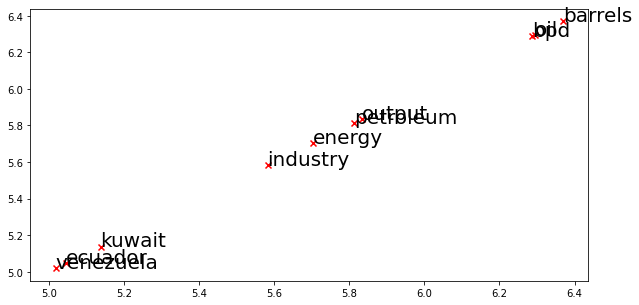

In [17]:
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
plot_embeddings(model, words)

### Power of Vectors

In [31]:
glove_file = datapath('/Users/amansawarn/Documents/tech/iitd/Building-Search-and-Recommendations-Together/glove_6B/glove.6B.300d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)


In [33]:
w1 = "magic"
w2 = "trickery"
w3 = "reality"
w1_w2_dist = model.distance(w1, w2)
w1_w3_dist = model.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))
print("=*"*40)

w1 = "london"
w2 = "trickery"
w3 = "reality"
w1_w2_dist = model.distance(w1, w2)
w1_w3_dist = model.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms magic, trickery have cosine distance: 0.7891970723867416
Antonyms magic, reality have cosine distance: 0.7379191219806671
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Synonyms london, trickery have cosine distance: 1.0854259356856346
Antonyms london, reality have cosine distance: 0.9164830222725868


In [34]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(model.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.6713276505470276),
 ('princess', 0.5432624220848083),
 ('throne', 0.5386105179786682),
 ('monarch', 0.5347574353218079),
 ('daughter', 0.498025119304657),
 ('mother', 0.49564430117607117),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747090458869934),
 ('prince', 0.4668239951133728),
 ('wife', 0.46473267674446106)]


In [35]:
pprint.pprint(model.most_similar('boy'))

[('girl', 0.8272891044616699),
 ('boys', 0.681233286857605),
 ('kid', 0.655293345451355),
 ('man', 0.6208277940750122),
 ('teenage', 0.5973849296569824),
 ('child', 0.5952883362770081),
 ('teenager', 0.5896497964859009),
 ('father', 0.5800690054893494),
 ('girls', 0.5745473504066467),
 ('son', 0.5726956129074097)]


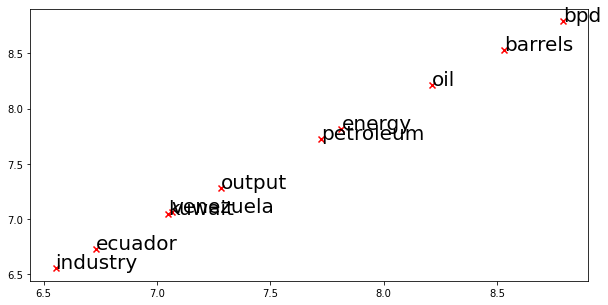

In [40]:
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
plot_embeddings(model, words)

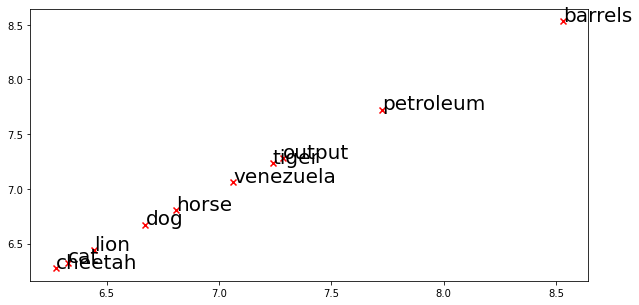

In [42]:
words = ['barrels', 'output', 'petroleum', 'venezuela', 'cat','tiger', 'dog', 'horse', 'cheetah', 'lion']
plot_embeddings(model, words)

### References

1. https://nlp.stanford.edu/projects/glove/
2. https://radimrehurek.com/gensim/scripts/glove2word2vec.html
3. https://github.com/leehanchung/cs224n/blob/master/a1/exploring_word_vectors.ipynb

In [29]:
len(glove_model['king'])

50